In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import entropy
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

#load dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('dataset/incident_profile_95.csv')

In [20]:
df.columns

Index(['CRASH_YEAR', 'CRASH_MONTH', 'BEAT_OF_OCCURRENCE', 'avg_age',
       'avg_responsibility_score', 'avg_weather_severity',
       'avg_roadway_severity', 'avg_lighting_severity', 'total_crashes',
       'fatality_rate', 'severe_injury_rate', 'avg_crash_severity_score',
       'injury_severity_score', 'vehicle_involvement_rate', 'night_crash_rate',
       'adverse_weather_crash_rate', 'road_defect_crash_rate',
       'speeding_influence', 'weekend_crash_rate', 'neo_patented_drivers',
       'senior_drivers', 'pct_neo_patented_drivers', 'pct_senior_drivers',
       'male_ratio', 'num_towed_units_LB', 'damage_low', 'damage_medium',
       'damage_high', 'damage_cost_LB', 'sum_lighting_category_daylight',
       'sum_lighting_category_night', 'sum_lighting_category_unknown',
       'sum_roadway_surface_category_dry', 'sum_roadway_surface_category_wet',
       'sum_roadway_surface_category_snow', 'sum_roadway_surface_category_ice',
       'sum_roadway_surface_category_unknown',
       

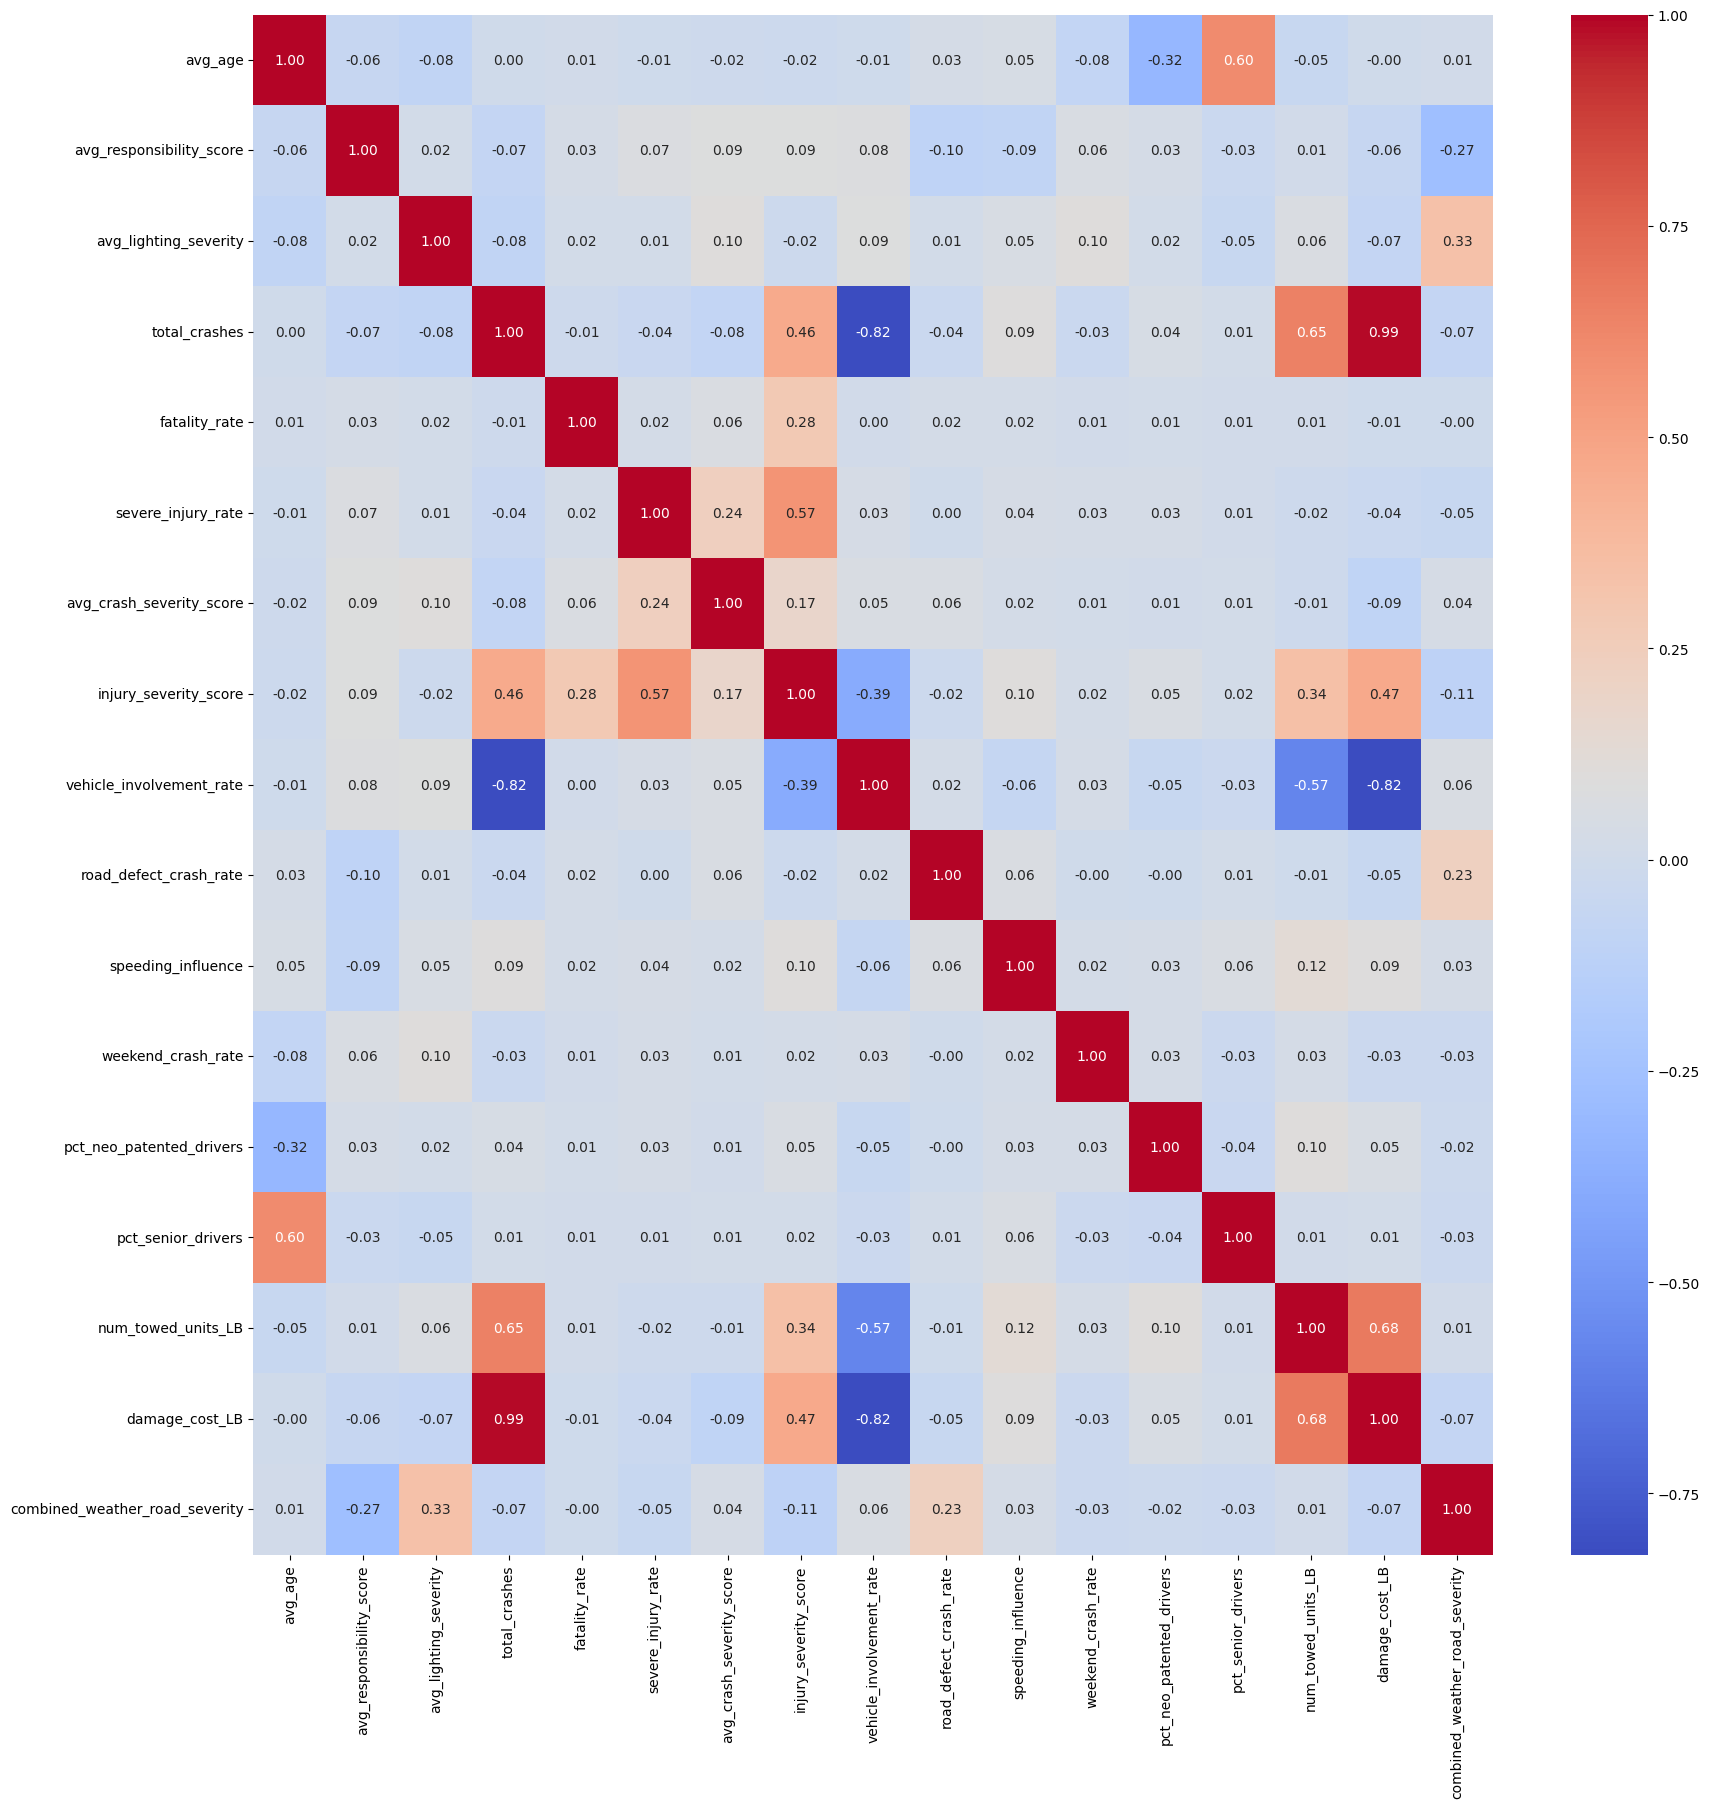

In [21]:
columns = ['avg_age', 'avg_responsibility_score', 
          'avg_lighting_severity', 'total_crashes', 'fatality_rate',
           'severe_injury_rate', 'avg_crash_severity_score', 'injury_severity_score', 'vehicle_involvement_rate',
           'road_defect_crash_rate', 'speeding_influence',
           'weekend_crash_rate', 'pct_neo_patented_drivers','pct_senior_drivers', 'num_towed_units_LB',
           'damage_cost_LB', 'combined_weather_road_severity']

plt.figure(figsize=(20, 20))
sns.heatmap(df[columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## Features for clustering

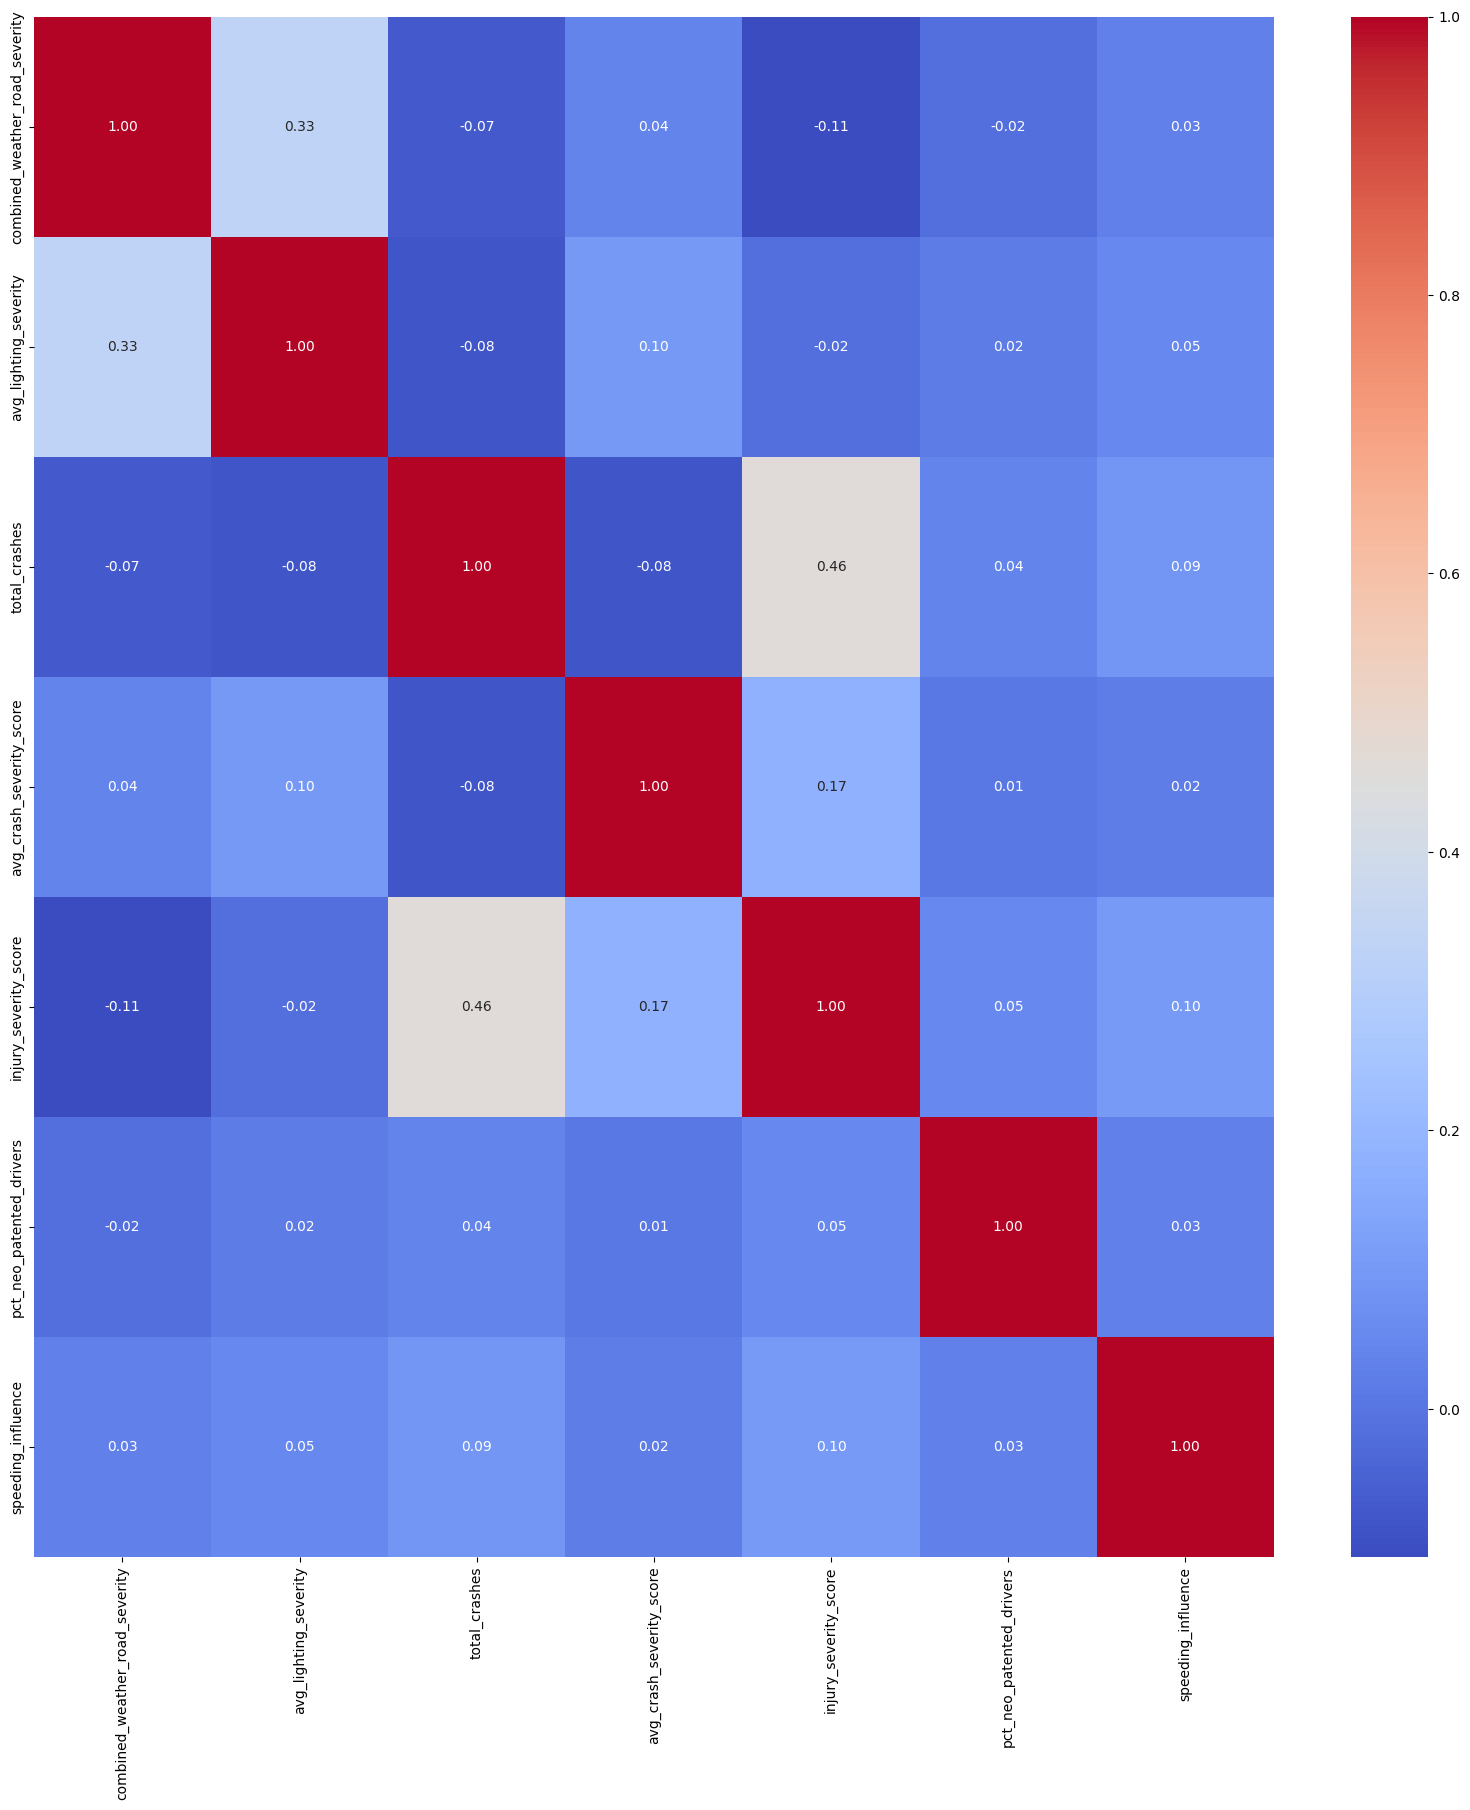

In [ ]:
selected_features = ['combined_weather_road_severity', 'avg_lighting_severity', 
                     'total_crashes', 'avg_crash_severity_score',
                     'injury_severity_score', 'pct_neo_patented_drivers', 'speeding_influence',]

plt.figure(figsize=(20, 20))
sns.heatmap(df[selected_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

### Some of them can be exchanged. Es. Damage_cost_LB with vehicle_involement_rate

In [23]:
#Possible features to use for validation 
validation_features = list(set(columns) - set(selected_features))
validation_features

['fatality_rate',
 'vehicle_involvement_rate',
 'damage_cost_LB',
 'weekend_crash_rate',
 'pct_senior_drivers',
 'avg_responsibility_score',
 'road_defect_crash_rate',
 'num_towed_units_LB',
 'avg_age',
 'severe_injury_rate']

## Standard Scaler

In [24]:
scaler_ss = StandardScaler()
df_cluster_ss = scaler_ss.fit_transform(df[selected_features])
df_cluster_ss = pd.DataFrame(df_cluster_ss, columns=df[selected_features].columns)
df_cluster_ss.head()

,combined_weather_road_severity,avg_lighting_severity,total_crashes,avg_crash_severity_score,injury_severity_score,pct_neo_patented_drivers,speeding_influence
0,0.324527,0.629869,-0.742116,-1.893666,-1.036241,-0.899940,-0.380612
1,0.922060,1.157535,-0.854102,-1.932561,-1.036241,-0.899940,-1.011187
2,-0.199338,-0.643431,-0.742116,-1.577732,-1.036241,-0.899940,-0.380612
3,0.344875,0.717059,1.105642,0.602162,0.324968,-0.899940,1.606295
4,0.496858,0.660072,0.153767,-1.593499,-1.036241,0.672986,0.039772


### Visualize the data with a 2D PCA

C:\Users\chucki\AppData\Local\Temp\ipykernel_5548\2539881587.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], cmap='viridis')


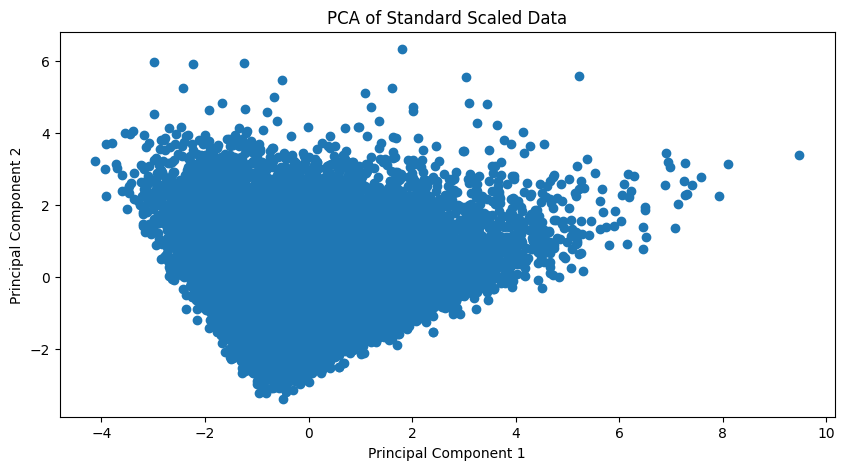

In [25]:
pca = PCA(n_components=2)
df_cluster_pca_ss = pca.fit_transform(df_cluster_ss)
plt.figure(figsize=(10, 5))
plt.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], cmap='viridis')
plt.title('PCA of Standard Scaled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### 3D PCA

C:\Users\chucki\AppData\Local\Temp\ipykernel_5548\3313555010.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], df_cluster_pca_ss[:, 2], cmap='viridis')


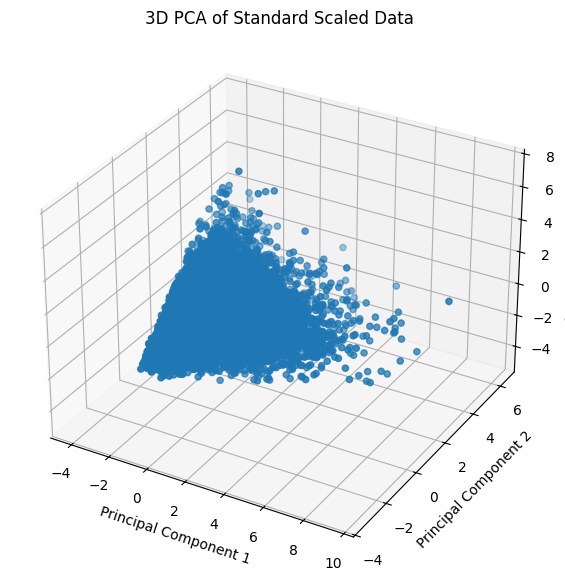

In [26]:
pca = PCA(n_components=3)
df_cluster_pca_ss = pca.fit_transform(df_cluster_ss)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], df_cluster_pca_ss[:, 2], cmap='viridis')
ax.set_title('3D PCA of Standard Scaled Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

## MinMaxScaler

In [27]:
scaler_mm = MinMaxScaler()
df_cluster_mm = scaler_mm.fit_transform(df[selected_features])
df_cluster_mm = pd.DataFrame(df_cluster_mm, columns=df[selected_features].columns)
df_cluster_mm.head()

,combined_weather_road_severity,avg_lighting_severity,total_crashes,avg_crash_severity_score,injury_severity_score,pct_neo_patented_drivers,speeding_influence
0,0.192713,0.417241,0.062893,0.028518,0.0,0.000000,0.050000
1,0.269595,0.490872,0.050314,0.024565,0.0,0.000000,0.000000
2,0.125309,0.239564,0.062893,0.060626,0.0,0.000000,0.050000
3,0.195331,0.429408,0.270440,0.282168,0.1,0.000000,0.207547
4,0.214886,0.421456,0.163522,0.059024,0.0,0.162162,0.083333


C:\Users\chucki\AppData\Local\Temp\ipykernel_5548\1883562660.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_cluster_pca_mm[:, 0], df_cluster_pca_mm[:, 1], cmap='viridis')


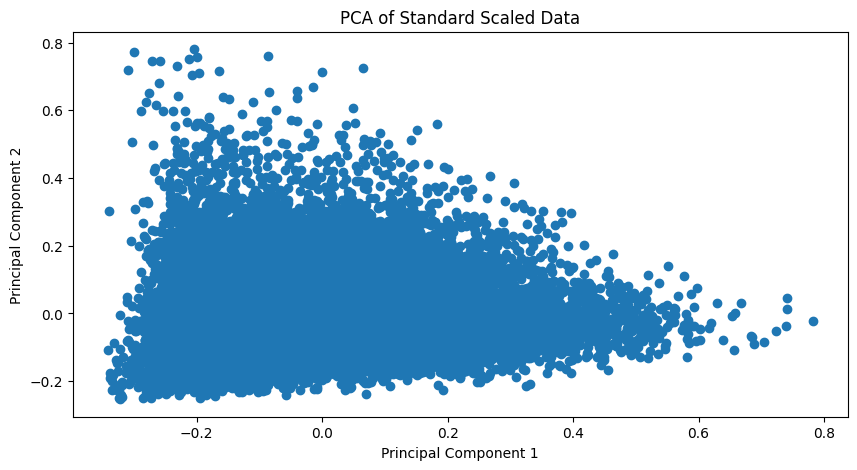

In [28]:
pca = PCA(n_components=2)
df_cluster_pca_mm = pca.fit_transform(df_cluster_mm)
plt.figure(figsize=(10, 5))
plt.scatter(df_cluster_pca_mm[:, 0], df_cluster_pca_mm[:, 1], cmap='viridis')
plt.title('PCA of Standard Scaled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

C:\Users\chucki\AppData\Local\Temp\ipykernel_5548\3296546043.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df_cluster_pca_mm[:, 0], df_cluster_pca_mm[:, 1], df_cluster_pca_mm[:, 2], cmap='viridis')


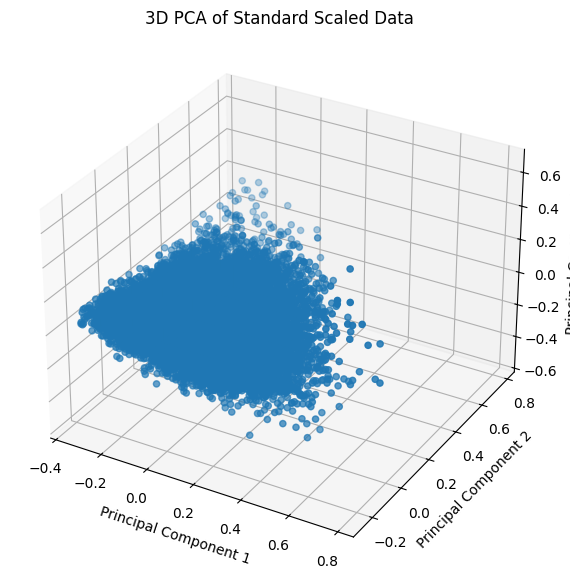

In [29]:
pca = PCA(n_components=3)
df_cluster_pca_mm = pca.fit_transform(df_cluster_mm)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster_pca_mm[:, 0], df_cluster_pca_mm[:, 1], df_cluster_pca_mm[:, 2], cmap='viridis')
ax.set_title('3D PCA of Standard Scaled Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

# K-Means

### Best random_state

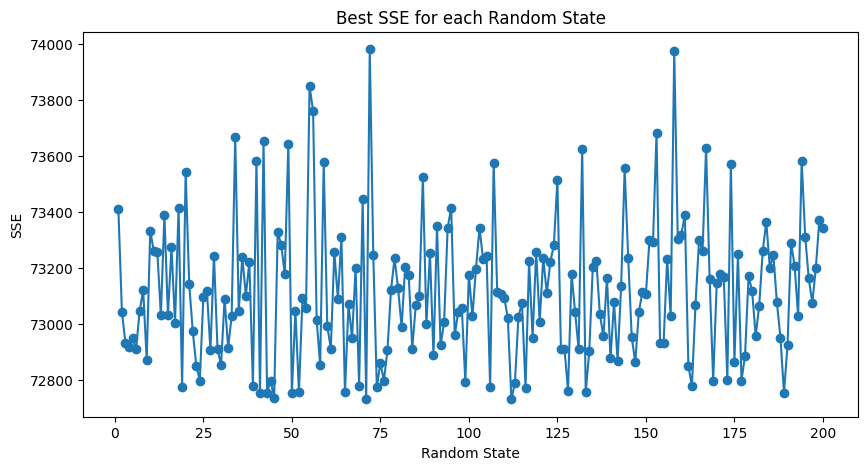

In [30]:
sse = []
rang = range(2, 18)
for random_state in range(1, 201):
    best_sse = float('inf')
    for k in rang:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(df_cluster_ss)
        if kmeans.inertia_ < best_sse:
            best_sse = kmeans.inertia_
    sse.append(best_sse)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 201), sse, marker='o')
plt.title('Best SSE for each Random State')
plt.xlabel('Random State')
plt.ylabel('SSE')
plt.show()

In [31]:
best_random_state = sse.index(min(sse)) + 1
best_random_state


112

## SSE to find the optimal K

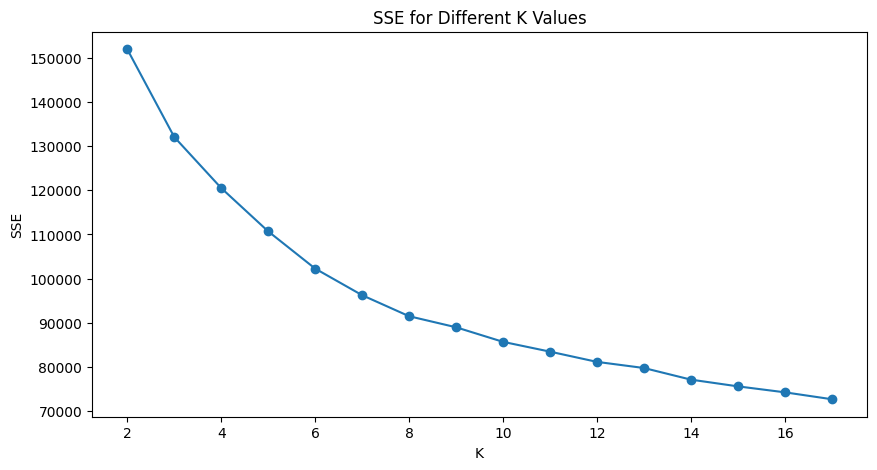

In [32]:
#plot sse for different k values
sse = []
for k in rang:
    kmeans = KMeans(n_clusters=k, random_state=best_random_state)
    kmeans.fit(df_cluster_ss)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(rang, sse, marker='o')
plt.title('SSE for Different K Values')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()


## Silhouette with different K

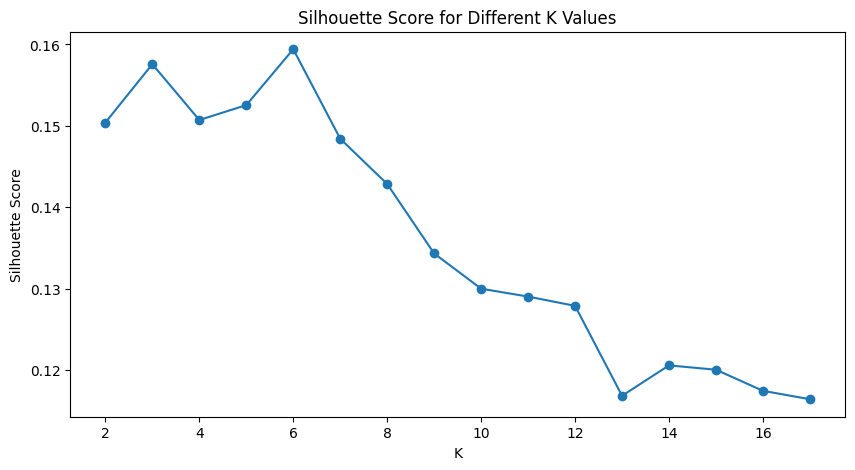

In [33]:
#silhouette score
sil = []
for k in rang:
    kmeans = KMeans(n_clusters=k, random_state=best_random_state)
    kmeans.fit(df_cluster_ss)
    sil.append(silhouette_score(df_cluster_ss, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(rang, sil, marker='o')
plt.title('Silhouette Score for Different K Values')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()


In [34]:
# use k = 6
kmeans = KMeans(n_clusters=6, random_state=best_random_state)
kmeans.fit(df_cluster_ss)
df['cluster'] = kmeans.labels_

df['cluster'].value_counts()

cluster
2    7835
3    4276
0    3979
1    3579
4    3486
5    1923
Name: count, dtype: int64

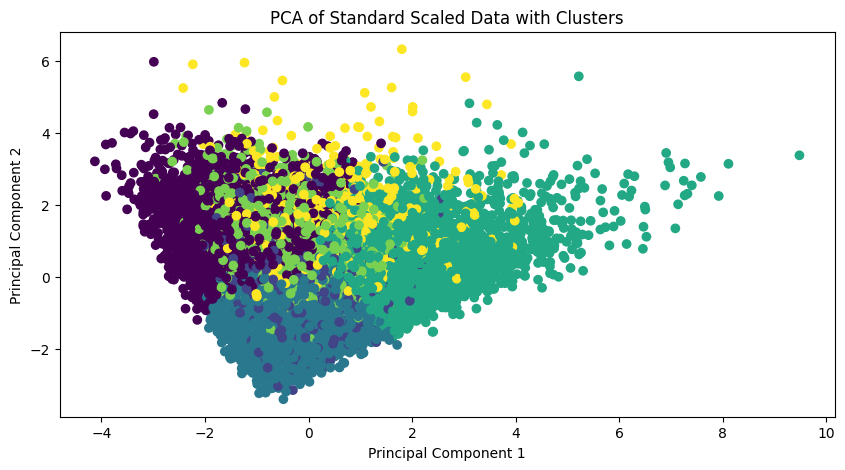

In [35]:
# plot clusters
plt.figure(figsize=(10, 5))
plt.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], c=df['cluster'], cmap='viridis')
plt.title('PCA of Standard Scaled Data with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


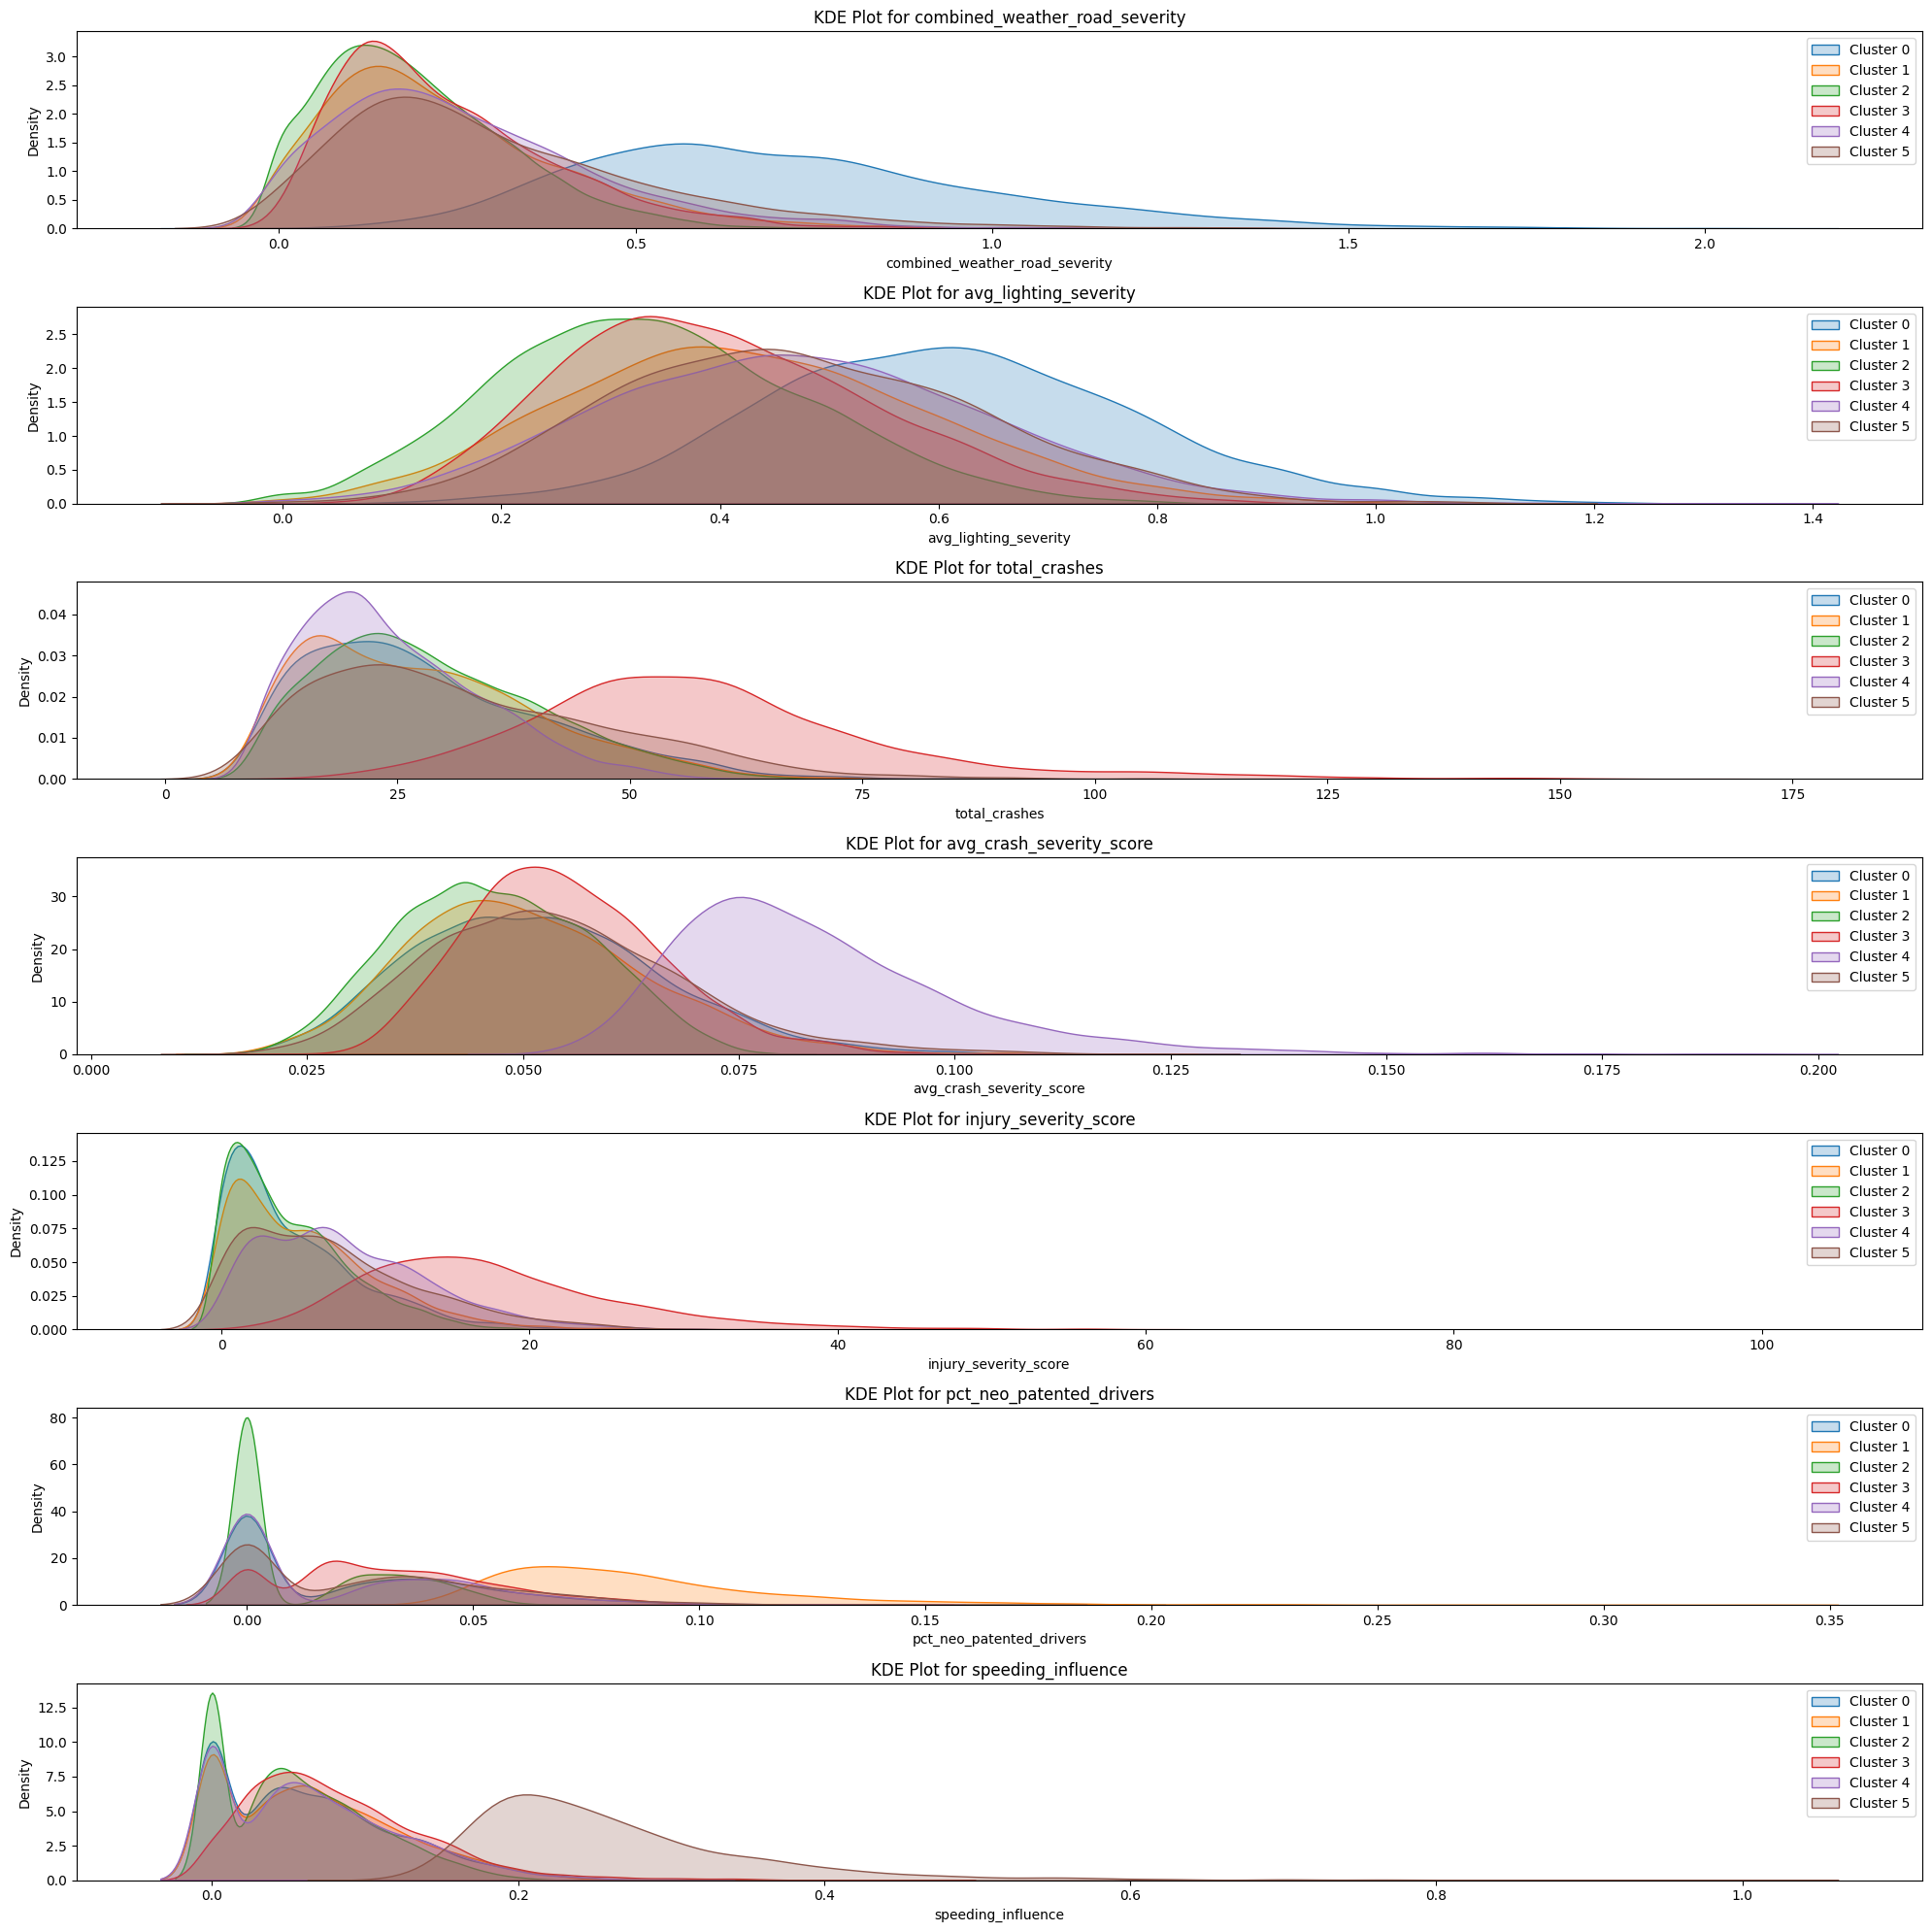

In [37]:
features = selected_features

plt.figure(figsize=(20, 20))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    for cluster in range(kmeans.n_clusters):
        sns.kdeplot(df[df['cluster'] == cluster][feature], label=f'Cluster {cluster}', fill=True)
    plt.title(f'KDE Plot for {feature}')
    plt.legend()
plt.tight_layout()
plt.show()